In [369]:
import requests
from PIL import Image
import io
import pandas as pd

In [370]:
subscription_key='84b059f0bedd4a9fac76fc104fad52c7'

In [371]:
assert subscription_key

In [372]:
face_api_url= 'https://20210117.cognitiveservices.azure.com/face/v1.0/detect'

In [385]:
img=Image.open('sample01.jpg')
with io.BytesIO() as output: 
    img.save(output,format='JPEG')
    binary_img=output.getvalue()
    
headers={'Content-Type':'application/octet-stream',
        'Ocp-Apim-Subscription-Key':subscription_key}
params={'returnFaceId':'true',
        'returnFaceAttributes':'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion'}


In [386]:
res=requests.post(face_api_url,params=params,headers=headers,data=binary_img)

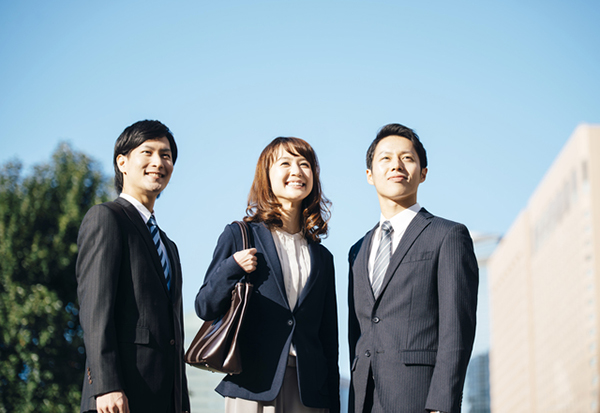

In [387]:
# img=Image.open('sample01.jpg')
img

In [388]:
with open('sample01.jpg','rb')as f:
    binary_img=f.read()
    

In [389]:
# binary_img

In [390]:
result=res.json()
result

[{'faceId': '8f1b4ae6-1510-4378-84b9-aac62df7e3d1',
  'faceRectangle': {'top': 144, 'left': 374, 'width': 46, 'height': 46},
  'faceAttributes': {'smile': 0.418,
   'headPose': {'pitch': 16.9, 'roll': -1.2, 'yaw': -0.0},
   'gender': 'male',
   'age': 30.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.002,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.418,
    'neutral': 0.576,
    'sadness': 0.004,
    'surprise': 0.0},
   'makeup': {'eyeMakeup': False, 'lipMakeup': False},
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.02,
    'invisible': False,
    'hairColor': [{'color': 'black', 'confidence': 0.99},
     {'color': 'brown', 'confidence': 0.93},
     {'color': 'other', 'confidence': 0.23},
     {'color': 'gray', 'confidence': 0.14},
     {'color': 'blond', 'confidence': 0.12},
     {'color': 'red', 'con

In [391]:
ages=result[0]['faceAttributes']['age']
ages

30.0

In [392]:
ages=df.loc[0]['faceAttributes']['age']
ages

30.0

In [393]:
rect=result[0]['faceRectangle']
rect

{'top': 144, 'left': 374, 'width': 46, 'height': 46}

In [394]:
from PIL import ImageDraw

In [395]:
draw=ImageDraw.Draw(img)

In [396]:
draw.rectangle([(rect['left'],rect['top']),(rect['left']+rect['width'],rect['top']+rect['height'])],
               fill=None,outline='green',width=5)

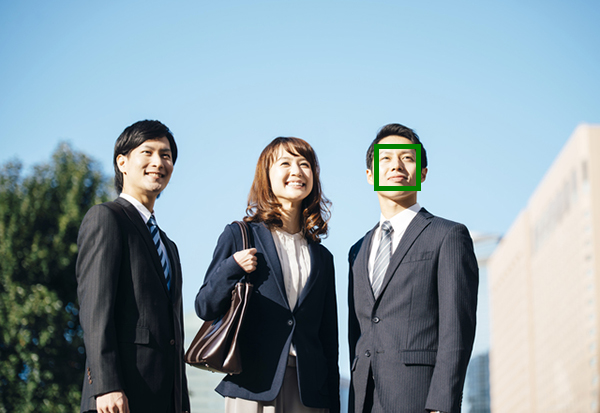

In [397]:
draw=ImageDraw.Draw(img)
img